# Location of alums

Author: Andrea Mock

The students who attend and have attended Wellesley College hail from all across the country, as well as all over the world. Similarly, Wellesley alumnae do not simply stay put after graduation, instead they disperse across the country and the world. In this notebook we explore the location of alums after graduation.

## Part 1: Read in data
First we read in the alumnae dataset. It includes data from alumnae from the Hive and Linkedin who either studied computer science or work in technology. 

In [1]:
# import pandas 
import pandas as pd

In [2]:
# read in data 
alum_data = pd.read_csv('alum_data_anon.csv', index_col = 0)

In [1]:
#alum_data.head()

## Part 2: Preprocess all locations
To find the locations, we first create a set of locations to avoid duplicates. We do this in order to avoid finding the coordinates for a location more than once if that particular location is present multiple times in our dataset. 

In [12]:
# create a set of unique locations
allLocations = set(list(alum_data['location']))

In [13]:
len(allLocations) # 457 unique locations

457

In [36]:
# convert unique locations to a list for further processing
allLocations_list = list(allLocations) 

In [37]:
allLocations_list[:10]

['Santa Barbara, CA',
 'Madison, WI',
 'Atlanta, GA',
 'Columbia, MD',
 'Acton, MA',
 'Geneva, Switzerland',
 'New Orleans, LA, USA',
 'Ithaca, NY',
 'Córdoba, Spain',
 'Greater Boston Area']

## Part 3: Finding the geolocation 
After having created a list of unique locations we use the geopy package to gather the longitude and latitude of a particular location.The longitude and latitude are saved as a tuple in a list with all of the locations.

In [66]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_user_agent")

In [72]:
# to avodid getting cutoff by the API for too many requests
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=5)

In [ ]:
lat_long_list = []
for i in range(len(allLocations)):
    try:
        loc = geolocator.geocode(allLocations_list[i])
    except:
        print('not found') # sometimes location is not found, in that case just add empty values
        loc = None
    
    # if location is not found then append empty tuple to our list
    if loc == None:
        tup = (0,0)
        lat_long_list.append(tup)
    else:
        # append the location tuple to list
        tup = (loc.latitude,loc.longitude)
        lat_long_list.append(tup)

In [116]:
location_geo = list(zip(allLocations_list, lat_long_list)) 

In [122]:
# create a dictionary of locations
location_dict = dict(location_geo)

## Part 4: Reading in location to Dataframe
With the geo coordinates determined for the unique locations we can now check each location in our dataset and add two columns to our original dataset that give the longitude and latitude of a specific location.

In [126]:
def getLocation(location): 
    """
    given a specitific location as a string returns the 
    corresponding longitude/latitude tuple
    """
    if location in location_dict:
        return location_dict[location]

In [131]:
# add two columns with longitude and latitude
alum_data['latitude'] = alum_data['location'].apply(lambda x: getLocation(x)[0])
alum_data['longitude'] = alum_data['location'].apply(lambda x: getLocation(x)[1])

In [134]:
# filter out those that don't have a location
alum_df_location = alum_data[alum_data['latitude'] != 0.000000]

In [2]:
# dataset now with longitude and latitude
#alum_df_location 

## Part 5: Plotting location data
With the generated dataframe including geo data we can use the geopandas library to plot the data. Using one of the geopandas built-in datasets we can create a plot of the world (or a subset of the world such as the United States) and subsequently plot all the geopoints that are the individual locations of alumae on it.

In [138]:
import geopandas
import matplotlib.pyplot as plt

In [140]:
# create geodataframe that allows for plotting with geopandas
gdf = geopandas.GeoDataFrame(
    alum_df_location, geometry=geopandas.points_from_xy(alum_df_location.longitude, alum_df_location.latitude))

In [142]:
# read in a dataset that continas the outline for the world as well as individual countries
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [185]:
# filter to have only the United States
us = world[world.name == "United States of America"]

In [187]:
# gather the geometry infromation for the us and filter our dataset for points only in the US
us_mask = gdf.within(us.loc[4, 'geometry'])
us_gdf = gdf.loc[us_mask]

In [3]:
us_gdf # only locations in the US

We first plot only the alums that are located in the US and their location.

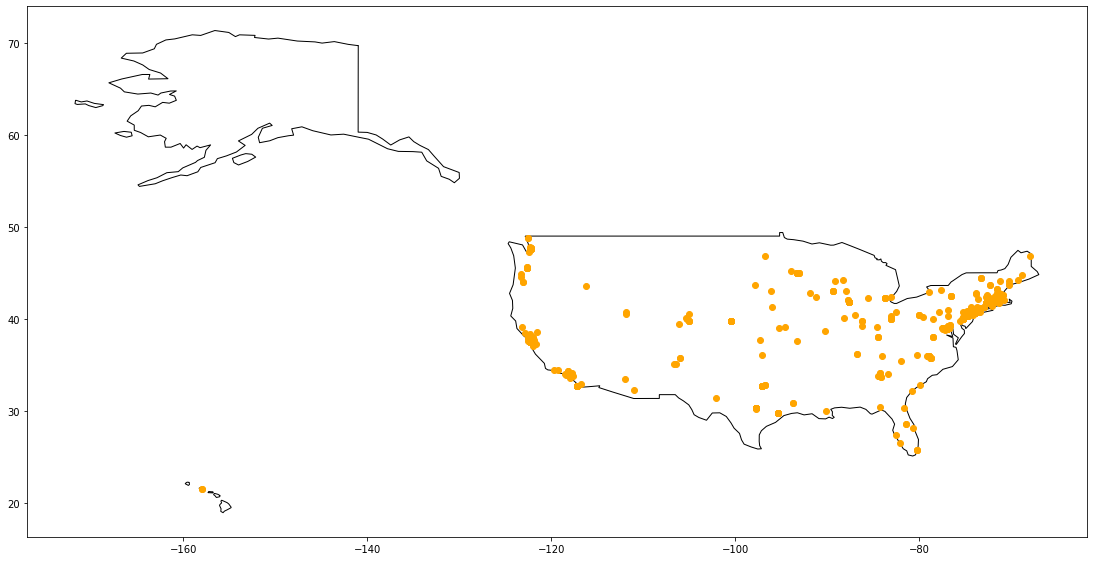

In [190]:
ax = us.plot(
    color='white', edgecolor='black', figsize=(19, 15))

# We can now plot our ``GeoDataFrame``.
us_gdf.plot(ax=ax, color='orange')

plt.show()

Plotting the alums that are located all around the world yields following map.

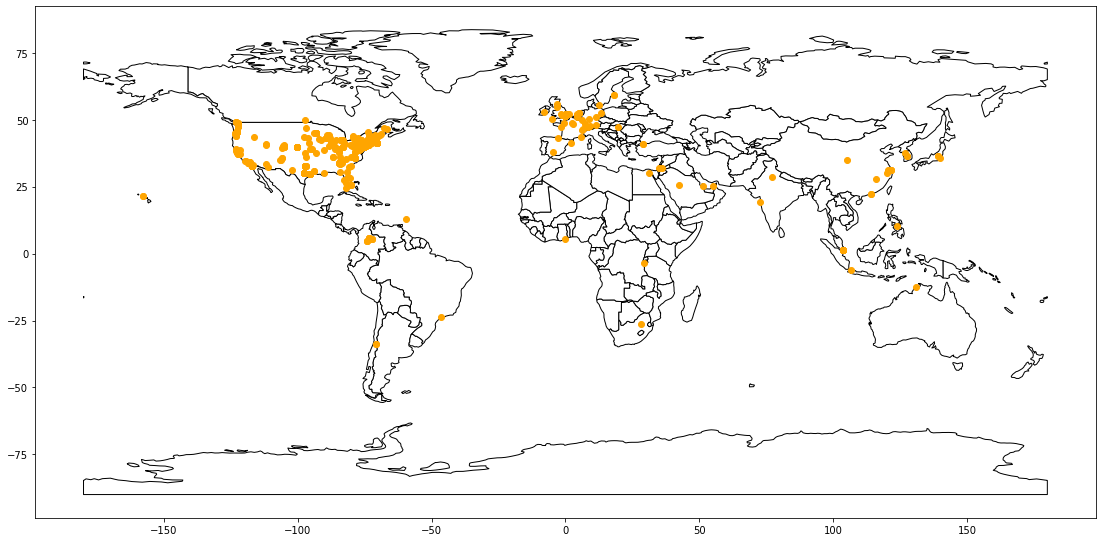

In [189]:
ax = world.plot(
    color='white', edgecolor='black', figsize=(19, 15))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='orange')

plt.show()